In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Eye_Dataset.csv",on_bad_lines='skip')
df.head()

,PID,AGE,SEX,DATE,PCM,DGS,EXM,STR,PRK
0,15863,46,MALE',01-JUL-10',sudden loss of vision ',Retinal Detetchment ',B-Scan',Repair Surgery',Treatment Going On'
1,15863,46,MALE',15-AUG-10',sudden loss of vision ',Retinal Detetchment ',B-Scan',Repair Surgery',Satisfied '
2,15864,42,FEMALE',01-JUL-10',sudden loss of vision ',Vitrous Haemoriage',B-Scan',Vitractomy Surgery',Treatment Going On'
3,15864,42,FEMALE',10-AUG-10',sudden loss of vision ',Vitrous Haemoriage',B-Scan',Vitractomy Surgery',Satisfied '
4,15865,9,MALE',01-JUL-10',sudden loss of vision ',Retinal Detetchment ',B-Scan',Repair Surgery',Treatment Going On'


In [3]:
df.shape

(835, 9)

In [4]:
df['LB']=df['STR']

In [5]:
df['LB'].replace(["Navanac Eye Drop'" , "Anti-Glaucoma Medication'","Tab: AZM,Navanac Eye Drop'","Tab: Vitamin A'","Corneal Transplantation '"],1,inplace=True)

In [6]:
df['LB'].replace(["Vitractomy Surgery'" , "Repair  Surgery'","Yag Laser Peripherial Iridotomy'","Yag LaserCapsulotomy'","Anti-Glaucoma Medication'","Inj: Avastin,Navanac Eye Drop'","Neurological Surgery'","Inj: Avastin,Argon Laser'","Inj: Avastin ,'Navanac Eye Drop'","Inj: Avastin ,Navanac Eye Drop'","Laser Peripherial Iridotomy'","Argon Laser '","Trebyculectomy'","Inj: Avastin,Navanac Eye Drop' '","Inj: Avastin,Argon Laser '","Inj: Avastin ,'Tab: AZM,Navanac Eye Drop''","Inj: Avastin ,'Tab: AZM,Navanac Eye Drop',","Trebyculectomy,Anti-Glaucoma Medication'","Inj: Avastin '","Inj: Avastin '","Neurological Disorder'"],0,inplace=True)

In [7]:
df.head(10)

,PID,AGE,SEX,DATE,PCM,DGS,EXM,STR,PRK,LB
0,15863,46,MALE',01-JUL-10',sudden loss of vision ',Retinal Detetchment ',B-Scan',Repair Surgery',Treatment Going On',0
1,15863,46,MALE',15-AUG-10',sudden loss of vision ',Retinal Detetchment ',B-Scan',Repair Surgery',Satisfied ',0
2,15864,42,FEMALE',01-JUL-10',sudden loss of vision ',Vitrous Haemoriage',B-Scan',Vitractomy Surgery',Treatment Going On',0
3,15864,42,FEMALE',10-AUG-10',sudden loss of vision ',Vitrous Haemoriage',B-Scan',Vitractomy Surgery',Satisfied ',0
4,15865,9,MALE',01-JUL-10',sudden loss of vision ',Retinal Detetchment ',B-Scan',Repair Surgery',Treatment Going On',0
5,15865,9,MALE',10-AUG-10',sudden loss of vision ',Retinal Detetchment ',B-Scan',Repair Surgery',UnSatisfied ',0
6,15866,60,MALE',01-JUL-10',Blured Vision ',Retinal Detetchment ',B-Scan',Repair Surgery',Treatment Going On',0
7,15866,60,MALE',15-AUG-10',Blured Vision ',Retinal Detetchment ',B-Scan',Repair Surgery',Leave Against Medical Advise',0
8,15872,3,MALE',01-JUL-10',Blured Vision ',Retinal Detetchment ',B-Scan',Repair Surgery',Leave Against Medical Advise',0
9,15880,64,MALE',02-JUL-10',Blured Vision ',Retinal Detetchment ',B-Scan',Vitractomy Surgery',Treatment Going On',0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PID     835 non-null    int64 
 1   AGE     835 non-null    int64 
 2   SEX     835 non-null    object
 3   DATE    835 non-null    object
 4   PCM     835 non-null    object
 5   DGS     835 non-null    object
 6   EXM     835 non-null    object
 7   STR     835 non-null    object
 8   PRK     835 non-null    object
 9   LB      835 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 65.4+ KB


In [9]:
df.describe()

,PID,AGE,LB
count,835.000000,835.000000,835.00000
mean,16465.417964,44.676647,0.20479
std,366.516398,20.023808,0.40379
min,15863.000000,1.000000,0.00000
25%,16129.500000,30.000000,0.00000
50%,16445.000000,50.000000,0.00000
75%,16789.000000,60.000000,0.00000
max,17113.000000,86.000000,1.00000


# DATA PREPROCESSING

In [10]:
df=df.replace("?",np.NaN)

In [11]:
pd.isna(df).sum()

PID     0
AGE     0
SEX     0
DATE    0
PCM     0
DGS     0
EXM     0
STR     0
PRK     1
LB      0
dtype: int64

In [12]:
for column in df.columns:
    if df[column].dtype =='object':
        df[column].fillna(df[column].mode()[0],inplace=True)

In [13]:
pd.isna(df).sum()

PID     0
AGE     0
SEX     0
DATE    0
PCM     0
DGS     0
EXM     0
STR     0
PRK     0
LB      0
dtype: int64

# DATA PREPARATION 

In [14]:
df['SEX'].value_counts()

MALE'      493
FEMALE'    342
Name: SEX, dtype: int64

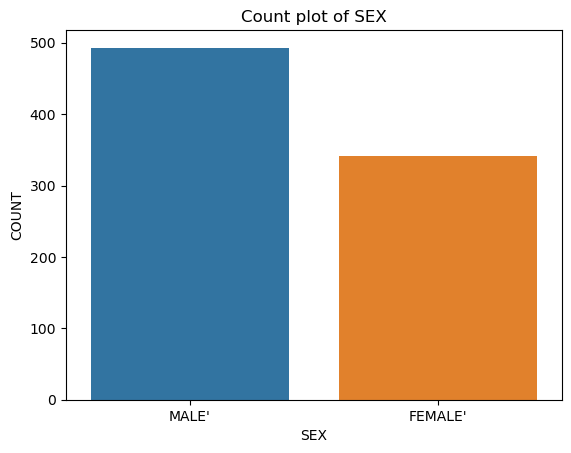

In [15]:
sns.countplot(x=df['SEX'])
plt.title('Count plot of SEX')
plt.xlabel("SEX")
plt.ylabel("COUNT")
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1=le.fit_transform(df['SEX'])
df['SEX']=df1

In [17]:
df['DATE'].value_counts()

27-SEP-10'    23
20-JUL-10'    22
06-JUL-10'    19
30-SEP-10'    19
15-JUL-10'    18
              ..
27-JUL-10      1
07-DEC-10'     1
09-SEP-10'     1
09-SEP-10      1
2-AUG-10'      1
Name: DATE, Length: 146, dtype: int64

In [18]:
df1=le.fit_transform(df['DATE'])
df['DATE']=df1

In [19]:
df['PCM'].value_counts()

Blured Vision '                         396
Raised Intra Occular Pressure '         149
sudden loss of vision '                 135
Decrease Vision '                        80
Loss Of Peripherial Field of Vision'     66
Decrease Vision in Both Eye'              9
Name: PCM, dtype: int64

In [20]:
df1=le.fit_transform(df["PCM"])
df['PCM']=df1

In [21]:
df['DGS'].value_counts()

Vitrous Haemoriage'                  246
Retinal Detetchment '                180
Angle Occular Glacoma'               148
Postirior Capsular Opacification'     48
Glaucoma'                             45
Diabetic Retinopathy'                 39
CSCR'                                 25
CRVO'                                 22
Macular Oedema'                       21
Neurological Disorder'                21
Temporal Defect'                      16
Retinitis Pigmentosa '                14
Keretoconrus '                         9
Pigmentosa'                            1
Name: DGS, dtype: int64

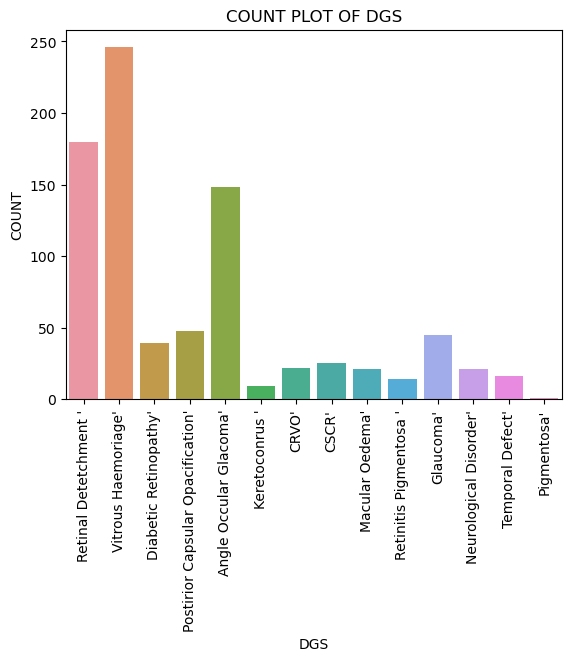

In [22]:
sns.countplot(x=df['DGS'])
plt.title("COUNT PLOT OF DGS")
plt.xlabel("DGS")
plt.ylabel("COUNT")
plt.xticks(rotation=90)
plt.show()

In [23]:
df1=le.fit_transform(df['DGS'])
df['DGS']=df1

In [24]:
df['EXM'].value_counts()

B-Scan'                427
Yag Laser'             192
FFA'                    68
Perimetry'              68
Argon Laser Grid'       29
Argon Laser  PRP'       21
Argon Laser BRVO'       21
Corneal Topography'      9
Name: EXM, dtype: int64

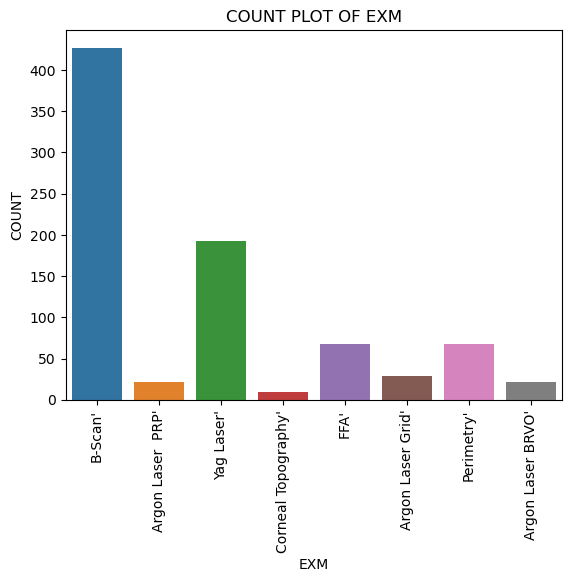

In [25]:
sns.countplot(x=df['EXM'])
plt.title('COUNT PLOT OF EXM')
plt.xlabel("EXM")
plt.ylabel("COUNT")
plt.xticks(rotation=90)
plt.show()

In [26]:
df1=le.fit_transform(df['EXM'])
df['EXM']=df1

In [27]:
df['STR'].value_counts()

Vitractomy Surgery'                           254
Repair  Surgery'                              173
Yag Laser Peripherial Iridotomy'              145
Navanac Eye Drop'                              87
Yag LaserCapsulotomy'                          47
Anti-Glaucoma Medication'                      45
Neurological Surgery'                          18
Tab: AZM,Navanac Eye Drop'                     15
Tab: Vitamin A'                                15
Corneal Transplantation '                       9
Inj: Avastin,Navanac Eye Drop'                  8
Inj: Avastin,Argon Laser '                      3
Inj: Avastin ,'Navanac Eye Drop'                3
Inj: Avastin ,Navanac Eye Drop'                 2
Laser Peripherial Iridotomy'                    2
Argon Laser '                                   1
Trebyculectomy'                                 1
Inj: Avastin,Navanac Eye Drop' '                1
Inj: Avastin,Argon Laser'                       1
Inj: Avastin ,'Tab: AZM,Navanac Eye Drop''      1


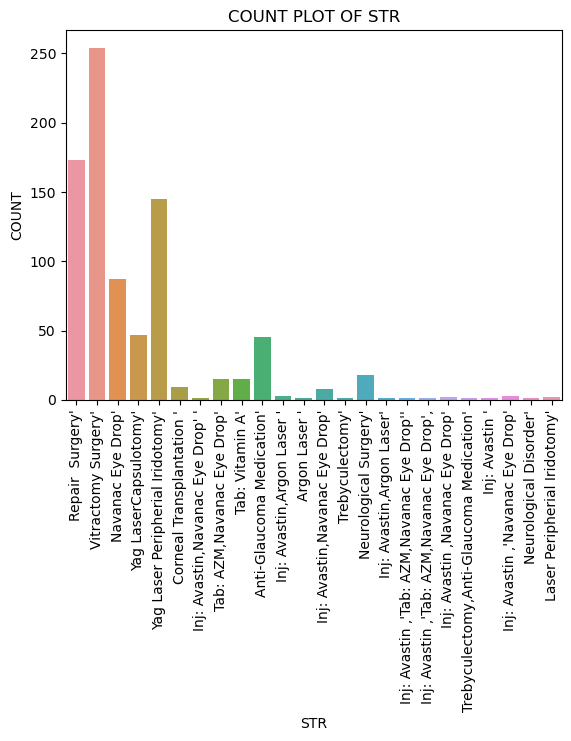

In [28]:
sns.countplot(x=df['STR'])
plt.title("COUNT PLOT OF STR")
plt.xlabel("STR")
plt.ylabel("COUNT")
plt.xticks(rotation=90)
plt.show()

In [29]:
df1=le.fit_transform(df['STR'])
df['STR']=df1

In [30]:
df['PRK'].value_counts()

Satisfied '                        426
Treatment Going On'                178
UnSatisfied '                      139
Leave Against Medical Advise'       84
Leave Against Medical Record  '      8
Name: PRK, dtype: int64

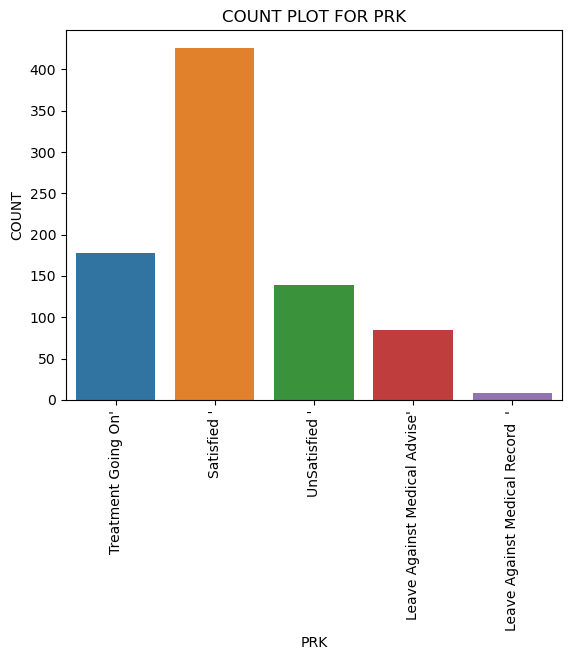

In [31]:
sns.countplot(x=df['PRK'])
plt.title("COUNT PLOT FOR PRK")
plt.xlabel("PRK")
plt.ylabel("COUNT")
plt.xticks(rotation=90)
plt.show()

In [32]:
df1=le.fit_transform(df['PRK'])
df['PRK']=df1

In [33]:
df.head()

,PID,AGE,SEX,DATE,PCM,DGS,EXM,STR,PRK,LB
0,15863,46,1,1,5,10,3,16,3,0
1,15863,46,1,65,5,10,3,16,2,0
2,15864,42,0,1,5,13,3,21,3,0
3,15864,42,0,42,5,13,3,21,2,0
4,15865,9,1,1,5,10,3,16,3,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PID     835 non-null    int64
 1   AGE     835 non-null    int64
 2   SEX     835 non-null    int32
 3   DATE    835 non-null    int32
 4   PCM     835 non-null    int32
 5   DGS     835 non-null    int32
 6   EXM     835 non-null    int32
 7   STR     835 non-null    int32
 8   PRK     835 non-null    int32
 9   LB      835 non-null    int64
dtypes: int32(7), int64(3)
memory usage: 42.5 KB


In [35]:
df.dtypes

PID     int64
AGE     int64
SEX     int32
DATE    int32
PCM     int32
DGS     int32
EXM     int32
STR     int32
PRK     int32
LB      int64
dtype: object

In [36]:
df.describe()

,PID,AGE,SEX,DATE,PCM,DGS,EXM,STR,PRK,LB
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.00000
mean,16465.417964,44.676647,0.590419,76.504192,1.876647,7.749701,4.177246,17.435928,2.335329,0.20479
std,366.516398,20.023808,0.492051,41.704176,2.056835,4.967362,1.930994,5.808218,1.086271,0.40379
min,15863.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,16129.500000,30.000000,0.000000,42.000000,0.000000,3.000000,3.000000,16.000000,2.000000,0.00000
50%,16445.000000,50.000000,1.000000,77.000000,1.000000,10.000000,3.000000,21.000000,2.000000,0.00000
75%,16789.000000,60.000000,1.000000,111.000000,4.000000,13.000000,6.000000,21.000000,3.000000,0.00000
max,17113.000000,86.000000,1.000000,145.000000,5.000000,13.000000,7.000000,23.000000,4.000000,1.00000


# OUTLIER DETECTION AND REMOVAL

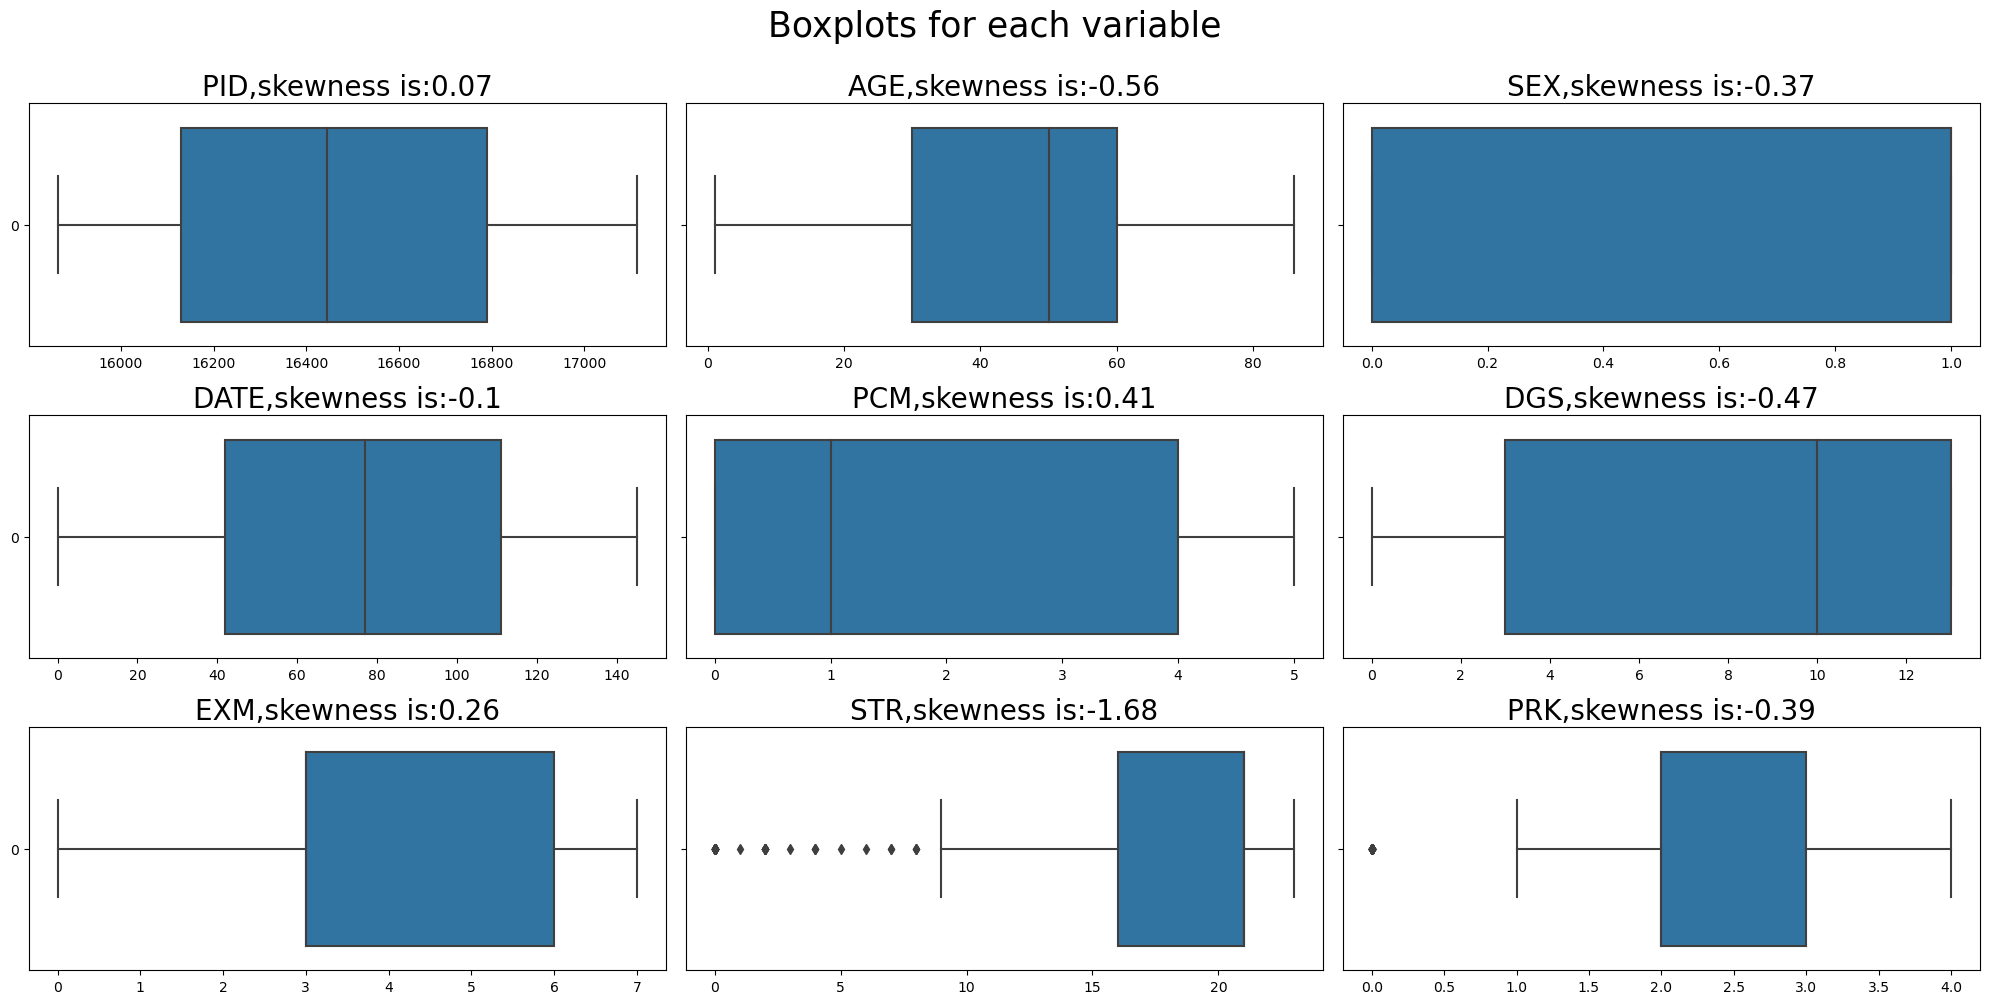

In [37]:
columns=['PID','AGE','SEX','DATE','PCM','DGS','EXM','STR','PRK']

def boxplots_custom(dataset,columns_list,rows,cols,suptitle):
    fig,axs=plt.subplots(rows,cols,sharey=True,figsize=(20,10))
    fig.suptitle(suptitle,y=1,size=25)
    axs=axs.flatten()
    for i,data in enumerate(columns_list):
        sns.boxplot(data=dataset[data],orient='h',ax=axs[i])
        axs[i].set_title(data+',skewness is:'+str(round(dataset[data].skew(axis=0,skipna=True),2)),size=20)
       
boxplots_custom(dataset=df,columns_list=columns,rows=3,cols=3,suptitle='Boxplots for each variable')        
plt.tight_layout()

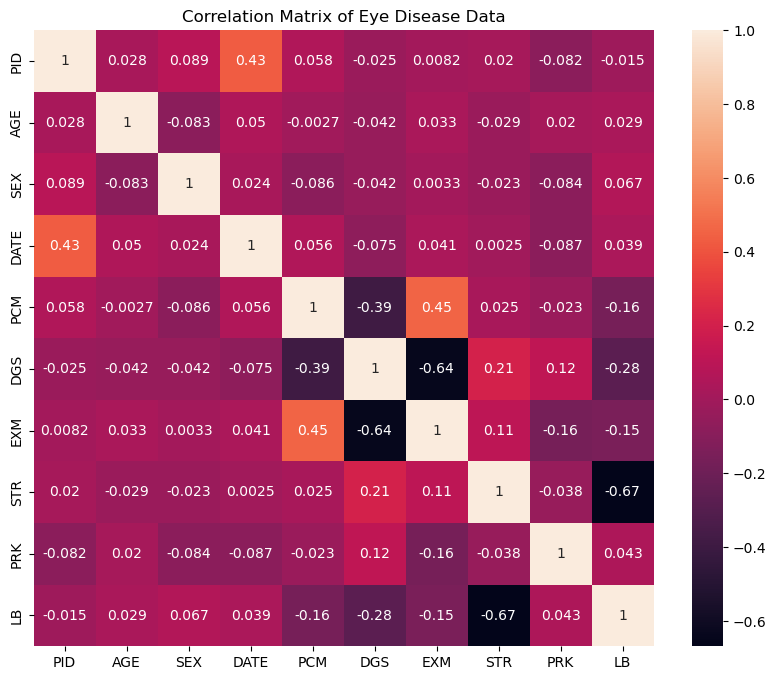

In [38]:
df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix of Eye Disease Data')
plt.show()

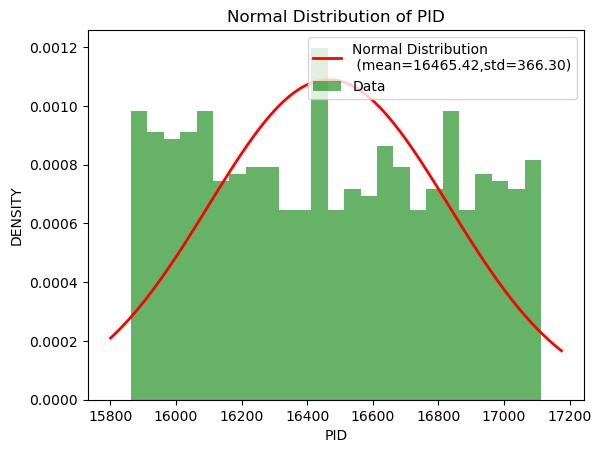

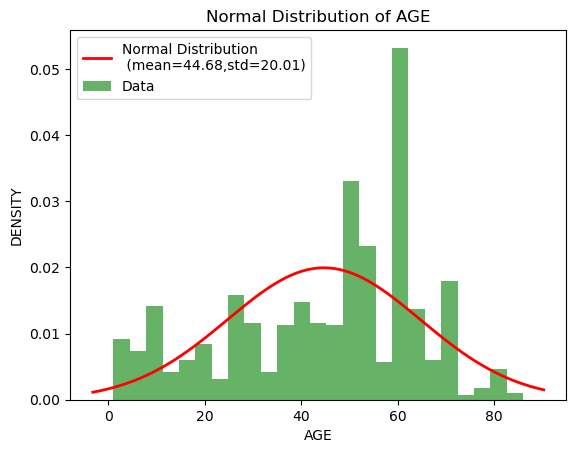

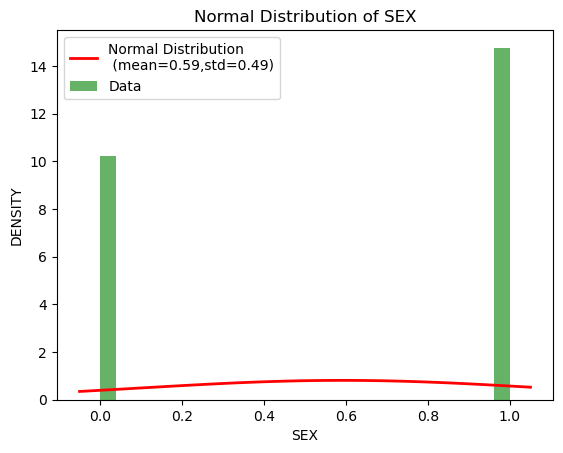

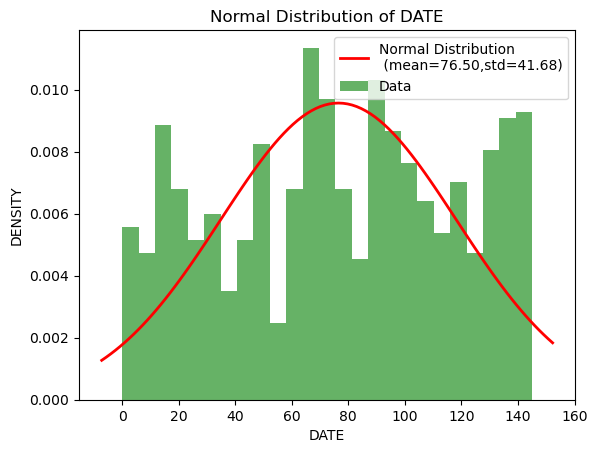

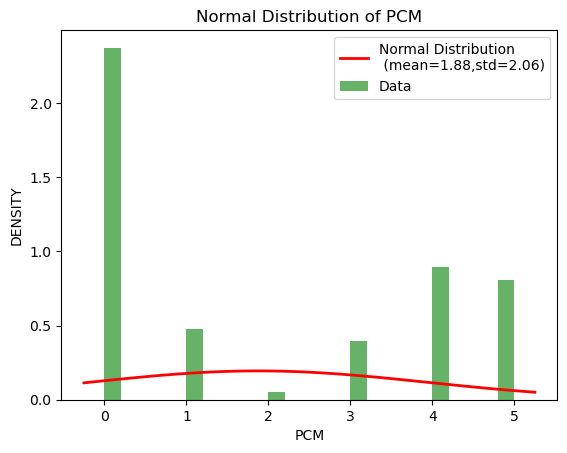

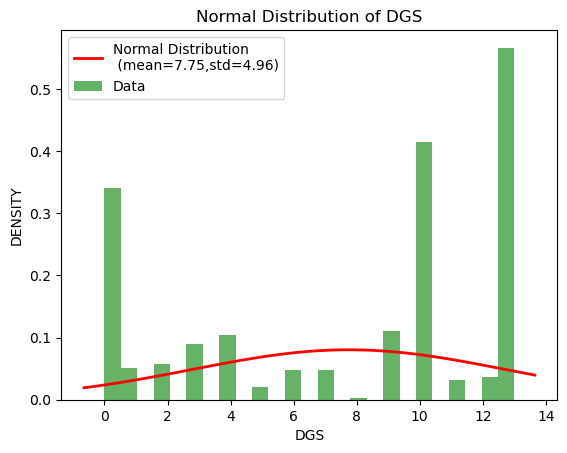

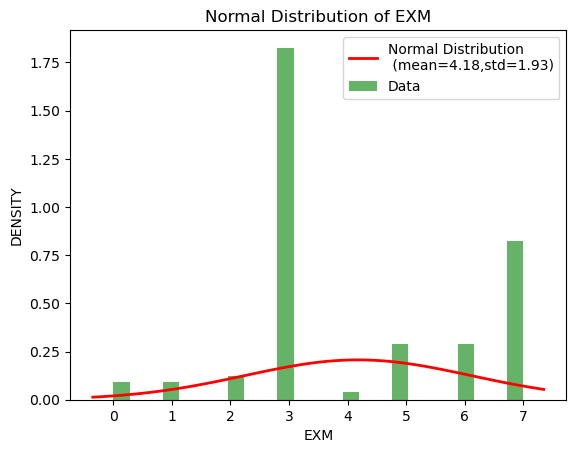

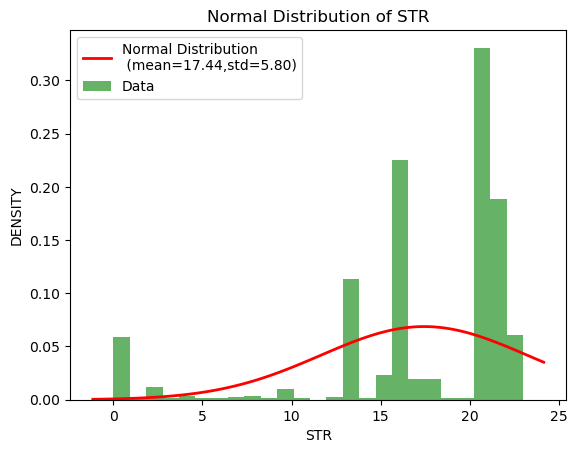

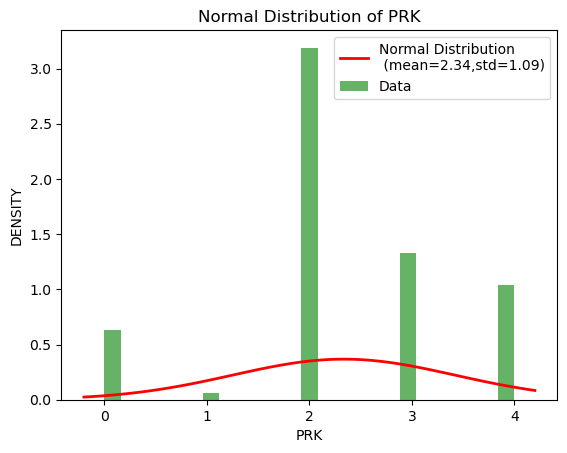

In [39]:
from scipy.stats import norm
columns=['PID','AGE','SEX','DATE','PCM','DGS','EXM','STR','PRK']


for i in columns:
    
    mu,std=norm.fit(df[i])
    
  
    plt.hist(df[i],bins=25,density=True,alpha=0.6,color='g')
    
   
    xmin,xmax=plt.xlim()
    x=np.linspace(xmin,xmax,100)
    
  
    y=norm.pdf(x,mu,std)
    
 
    plt.plot(x,y,'r',linewidth=2)
    
   
    plt.legend([f'Normal Distribution\n (mean={mu:.2f},std={std:.2f})','Data'])
    
  
    plt.xlabel(i)
    plt.ylabel("DENSITY")
    plt.title(f'Normal Distribution of {i}')
              
   
    plt.show()          

In [40]:
from scipy.stats import shapiro
columns=['PID','AGE','SEX','DATE','PCM','DGS','EXM','STR','PRK']
for col in columns:
    stat,p=shapiro(df)
    alpha=0.05
    if p>alpha:
        print("The data",col,"is normally distributed")
    else:

        print("The data",col,"is not normally distributed")

The data PID is not normally distributed
The data AGE is not normally distributed
The data SEX is not normally distributed
The data DATE is not normally distributed
The data PCM is not normally distributed
The data DGS is not normally distributed
The data EXM is not normally distributed
The data STR is not normally distributed
The data PRK is not normally distributed


In [41]:
def remove_outliers_zscore(df1,columns,threshold=3):
    for col in columns:
        z_scores=np.abs((df1[col]-df1[col].mean())/df1[col].std())
        df1[col][z_scores > threshold] = np.nan
    df1.dropna(inplace=True)
columns=['STR','PRK']
remove_outliers_zscore(df,columns)

In [42]:
df.shape

(790, 10)

In [43]:
df.isnull().sum()

PID     0
AGE     0
SEX     0
DATE    0
PCM     0
DGS     0
EXM     0
STR     0
PRK     0
LB      0
dtype: int64

# DATA PREDICTION

# STAGE-1

In [44]:
x=df.iloc[:,[1,2,4,5,6,8]]
y=df.iloc[:,9]

In [45]:
x

,AGE,SEX,PCM,DGS,EXM,PRK
0,46,1,5,10,3,3
1,46,1,5,10,3,2
2,42,0,5,13,3,3
3,42,0,5,13,3,2
4,9,1,5,10,3,3
...,...,...,...,...,...,...
830,52,1,0,3,2,3
831,52,1,0,3,2,3
832,52,1,0,3,2,2
833,30,1,4,0,7,2


In [46]:
y

0      0
1      0
2      0
3      0
4      0
      ..
830    1
831    1
832    1
833    0
834    0
Name: LB, Length: 790, dtype: int64

In [47]:
df

,PID,AGE,SEX,DATE,PCM,DGS,EXM,STR,PRK,LB
0,15863,46,1,1,5,10,3,16.0,3,0
1,15863,46,1,65,5,10,3,16.0,2,0
2,15864,42,0,1,5,13,3,21.0,3,0
3,15864,42,0,42,5,13,3,21.0,2,0
4,15865,9,1,1,5,10,3,16.0,3,0
...,...,...,...,...,...,...,...,...,...,...
830,17108,52,1,143,0,3,2,13.0,3,1
831,17108,52,1,54,0,3,2,13.0,3,1
832,17108,52,1,116,0,3,2,13.0,2,1
833,17109,30,1,143,4,0,7,22.0,2,0


In [48]:
xdf=pd.DataFrame(x)
print(xdf.shape)
xdf.head()

(790, 6)


,AGE,SEX,PCM,DGS,EXM,PRK
0,46,1,5,10,3,3
1,46,1,5,10,3,2
2,42,0,5,13,3,3
3,42,0,5,13,3,2
4,9,1,5,10,3,3


In [49]:
y.shape

(790,)

In [50]:
ydf=pd.DataFrame(y)
ydf.head(5)

,LB
0,0
1,0
2,0
3,0
4,0


# MACHINE LEARNING ALGORITHMS

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models=[]
models.append(('NB',GaussianNB()))
models.append(('MLP',MLPClassifier(hidden_layer_sizes=(8,7,6),verbose=False,learning_rate_init=0.01,learning_rate='constant',activation='tanh',max_iter=300,solver='adam',alpha=0.0001)))
models.append(('DT',DecisionTreeClassifier(criterion='entropy',max_depth=2)))
models.append(('RF',RandomForestClassifier(n_estimators=27,random_state=7,max_depth=6)))
models.append(('SVM',SVC(kernel='linear',decision_function_shape='ovr',C=0.001,gamma=15)))


In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score


models=[('Naive Bayes',GaussianNB()),('MLP',MLPClassifier()),('Decision Tree',DecisionTreeClassifier()),('Random Forest', RandomForestClassifier()),('SVM',SVC()),
        ]
param_grids = [
    {'var_smoothing': np.logspace(0,-9, num=100)},
    {'hidden_layer_sizes': [(10,15,20), (10,8,6), (10,)],
     'activation': ['tanh', 'relu'],
     'solver': ['adam'],
     'alpha': [0.0001, 0.05],
     'learning_rate': ['constant','adaptive']},
    {'max_depth': range(1,7),'criterion': ['gini', 'entropy']},
    {'n_estimators': [10, 50, 100], 
     'max_features': ['sqrt', 'log2'],
     'max_depth':range(1,7)},
    {'C': [0.1, 10, 50], 
     'gamma': [1, 0.1, 0.01],
     'kernel': ['sigmoid', 'linear']}]
     
best_params = {}
for i, (name, model) in enumerate(models):
    grid_search = GridSearchCV(model, param_grids[i], cv=10, scoring='accuracy')
    grid_search.fit(x, y)
    best_params[name] = grid_search.best_params_

print("BEST PARAMETERS:")
for key, value in best_params.items():
    print(key, value)

BEST PARAMETERS:
Naive Bayes {'var_smoothing': 0.0001873817422860383}
MLP {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 8, 6), 'learning_rate': 'constant', 'solver': 'adam'}
Decision Tree {'criterion': 'entropy', 'max_depth': 6}
Random Forest {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}
SVM {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [53]:

models=[]
models.append(('NB',GaussianNB(var_smoothing= 0.0001873817422860383)))
models.append(('MLP',MLPClassifier(hidden_layer_sizes=(20,15,10),verbose=False,learning_rate_init=0.01,
                                   learning_rate='adaptive',activation='tanh',max_iter=300,solver='adam', alpha=0.0001)))
models.append(('DT',DecisionTreeClassifier(criterion='entropy',max_depth=2)))
models.append(('RF',RandomForestClassifier(n_estimators=27,random_state=7,max_depth=6)))
models.append(('SVM',SVC(kernel='linear',decision_function_shape='ovr',C=0.001,gamma=15)))


# BASELINE IMPLEMENTATION

# 10(K)-FOLD

In [54]:
import time
accuracy=dict()
tt=dict()

from sklearn.model_selection import cross_val_score,KFold
for name,model in models:
    kfold=KFold(n_splits=10)
    st=time.time()
    acc=cross_val_score(model,x,y,cv=kfold,scoring='accuracy')
    et=time.time()
    accuracy[name]=(acc.mean())
    tt[name]=et-st

print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)

print("\nTIME:")
for key,value in tt.items():
    print(key,value)

ACCURACY:
NB 0.9037974683544304
MLP 0.9367088607594937
DT 0.930379746835443
RF 0.9835443037974685
SVM 0.8658227848101265

TIME:
NB 0.10618710517883301
MLP 3.0510435104370117
DT 0.06574583053588867
RF 0.601534366607666
SVM 0.17176485061645508


# VARIANCE AND STANDARD DEVIATION

In [55]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

num_folds = 10

kf = KFold(n_splits=num_folds, shuffle=True)
variances = dict()
std_devs = dict()

for name, model in models:
    fold_variances = []
    fold_std_devs = []

    for fold_num, (train_indices, test_indices) in enumerate(kf.split(x,y)):
        model.fit(x.iloc[train_indices], y.iloc[train_indices])
        y_pred = model.predict(x.iloc[test_indices])
        mse = mean_squared_error(y.iloc[test_indices], y_pred)
        variance = np.var(y.iloc[test_indices] - y_pred)
        std_dev = np.sqrt(mse)

        fold_variances.append(variance)
        fold_std_devs.append(std_dev)
  
    variances[name] = (np.mean(fold_variances))/10
    std_devs[name] = (np.mean(fold_std_devs))/10


print("\nVariance:")
for key, value in variances.items():
    print(key, value)

print("\nStandard Deviation:")
for key, value in std_devs.items():
    print(key, value)



Variance:
NB 0.00845056881909951
MLP 0.0054991187309725974
DT 0.006422047748758211
RF 0.002358596378785452
SVM 0.011248197404262132

Standard Deviation:
NB 0.03041596688942454
MLP 0.023004221604341474
DT 0.026042705762345943
RF 0.012596655627710823
SVM 0.035768362670347185


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


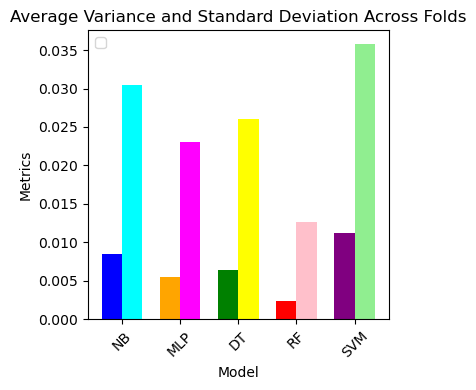

In [56]:
variance_colors = ['blue', 'orange', 'green', 'red', 'purple'] 
std_dev_colors = ['cyan', 'magenta', 'yellow', 'pink', 'lightgreen']
bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(4,4))

bar1 = ax.bar(index - bar_width/2, list(variances.values()), bar_width, color=variance_colors)
bar2 = ax.bar(index + bar_width/2, list(std_devs.values()), bar_width,color=std_dev_colors)

ax.set_xlabel('Model')
ax.set_ylabel('Metrics')
ax.set_title('Average Variance and Standard Deviation Across Folds')
ax.set_xticks(index)
ax.set_xticklabels(list(variances.keys()), rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# 50-50

In [57]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics

accuracy=dict()
precision=dict()
recall=dict()
ttfFontProperty=dict()

for name,model in models:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=7)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()

    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
    tt[name]=et-st

print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)

print("\nTIME:")
for key,value in tt.items():
    print(key,value)

ACCURACY:
NB 0.9088607594936708
MLP 0.9341772151898734
DT 0.9367088607594937
RF 0.9772151898734177
SVM 0.8481012658227848

TIME:
NB 0.005978584289550781
MLP 0.28014540672302246
DT 0.0
RF 0.06250739097595215
SVM 0.015621662139892578


# 60-40

In [58]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics

accuracy=dict()
tt=dict()

for name,model in models:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=7)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
    tt[name]=et-st

print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)

print("\nTIME:")
for key,value in tt.items():
    print(key,value)

ACCURACY:
NB 0.9113924050632911
MLP 0.9208860759493671
DT 0.9367088607594937
RF 0.9683544303797469
SVM 0.8449367088607594

TIME:
NB 0.00452113151550293
MLP 0.137786865234375
DT 0.0
RF 0.048073768615722656
SVM 0.015627384185791016


# 70-30

In [59]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import time
accuracy=dict()
tt=dict()

for name,model in models:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=43)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
    tt[name]=et-st

print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)

print("\nTIME:")
for key,value in tt.items():
    print(key,value)

ACCURACY:
NB 0.8987341772151899
MLP 0.9113924050632911
DT 0.9324894514767933
RF 0.9789029535864979
SVM 0.8312236286919831

TIME:
NB 0.0
MLP 0.3385505676269531
DT 0.0
RF 0.05454516410827637
SVM 0.015639543533325195


# 80-20

In [60]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

accuracy=dict()
precision=dict()
recall=dict()
f1score=dict()
roc=dict()
tt=dict()
for name,model in models:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=11)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
    precision[name]=metrics.precision_score(y_test, y_pred,average='micro')
    f1score[name]=metrics.f1_score(y_test,y_pred)
    recall[name]=metrics.recall_score(y_test, y_pred,average='micro')
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc[name]=auc(fpr, tpr)
    tt[name]=et-st
    
print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)
print("\nPRECISION:")
for key,value in precision.items():
    print(key,value)
print("\nRECALL:")
for key,value in recall.items():
    print(key,value)
print("\nF1 SCORE:")
for key,value in f1score.items():
    print(key,value)
print("\nROC:")
for key,value in roc.items():
    print(key,value)
print("\nTIME:")
for key,value in tt.items():
    print(key,value)

ACCURACY:
NB 0.930379746835443
MLP 0.9493670886075949
DT 0.9430379746835443
RF 0.9746835443037974
SVM 0.8734177215189873

PRECISION:
NB 0.930379746835443
MLP 0.9493670886075949
DT 0.9430379746835443
RF 0.9746835443037974
SVM 0.8734177215189873

RECALL:
NB 0.930379746835443
MLP 0.9493670886075949
DT 0.9430379746835443
RF 0.9746835443037974
SVM 0.8734177215189873

F1 SCORE:
NB 0.717948717948718
MLP 0.8260869565217391
DT 0.7804878048780488
RF 0.92
SVM 0.3333333333333333

ROC:
NB 0.78
MLP 0.8724812030075187
DT 0.8200000000000001
RF 0.9524812030075187
SVM 0.6

TIME:
NB 0.0019974708557128906
MLP 0.42510557174682617
DT 0.00629425048828125
RF 0.06561112403869629
SVM 0.015625953674316406


# VOTING IMPLEMENTATION

In [61]:
from sklearn.ensemble import VotingClassifier
nb1 = GaussianNB()
nb2 = GaussianNB()
nb3 = GaussianNB()

voting_clfnb = VotingClassifier(estimators=[('naivebayes1', nb1), ('naivebayes2', nb2),('naivebayes3', nb3)], voting='hard')

In [62]:
mlp1 = MLPClassifier(hidden_layer_sizes=(8,7),random_state=7,verbose=False,max_iter=500)
mlp2 = MLPClassifier(hidden_layer_sizes=(9,8),random_state=7,verbose=False,max_iter=500)

voting_clfmlp = VotingClassifier(estimators=[('multilp1', mlp1), ('multilp2', mlp2)], voting='soft')

In [63]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf3 = DecisionTreeClassifier(criterion='entropy', max_depth=2)

voting_clfdt = VotingClassifier(estimators=[('clf1', clf1), ('clf3', clf3)], voting='soft')

In [64]:
rfc1 = RandomForestClassifier(n_estimators=15, max_depth=5, random_state=42)
rfc2 = RandomForestClassifier(n_estimators=10, max_depth=8, random_state=42)
rfc3 = RandomForestClassifier(n_estimators=15, max_depth=6, random_state=42)

voting_clfrf = VotingClassifier(estimators=[('rf1', rfc1), ('rf2', rfc2), ('rf3', rfc3)], voting='hard')

In [65]:
svm1 = SVC(kernel='sigmoid', C=20,gamma=0.01)
svm2 = SVC(kernel='rbf',C=20,gamma=0.01)
svm3 = SVC(kernel='poly',C=20,gamma=0.01)

voting_clfsvm = VotingClassifier(estimators=[('svm1', svm1), ('svm2', svm2), ('svm3', svm3)], voting='hard')

In [66]:
votingmodel=[]
votingmodel.append(('MLP',VotingClassifier(estimators=[('multilp1', mlp1), ('multilp2', mlp2)], voting='hard')))
votingmodel.append(('DT',VotingClassifier(estimators=[('clf1', clf1), ('clf3', clf3)], voting='hard')))
votingmodel.append(('RF',VotingClassifier(estimators=[('rf1', rfc1), ('rf2', rfc2), ('rf3', rfc3)], voting='hard')))
votingmodel.append(('SVC',VotingClassifier(estimators=[('svm1', svm1), ('svm2', svm2), ('svm3', svm3)], voting='hard')))



# 10(k)-fold

In [67]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
def votingclffold(voting_clf):
  x, y = make_classification(n_samples=1024, n_features=14, random_state=7) 
  kfold = KFold(n_splits=10, shuffle=True, random_state=7) 
  scores = cross_val_score(voting_clf, x, y, cv=kfold)
  accuracy=scores.mean()
  return accuracy

print("Voting(10-fold)- NB ",votingclffold(voting_clfnb))
print("Voting(10-fold)- MLP ",votingclffold(voting_clfmlp))
print("Voting(10-fold)- DT ",votingclffold(voting_clfdt))
print("Voting(10-fold)- RF ",votingclffold(voting_clfrf))
print("Voting(10-fold)- SVC ",votingclffold(voting_clfsvm))



Voting(10-fold)- NB  0.8955549209975253
Voting(10-fold)- MLP  0.916990291262136
Voting(10-fold)- DT  0.9092137826004189
Voting(10-fold)- RF  0.9209594517418619
Voting(10-fold)- SVC  0.9101751380163717


# 50-50

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=7)
traindf=pd.DataFrame(x_train)
traindf.shape

(395, 6)

In [69]:
from sklearn.naive_bayes import GaussianNB

nb1 = GaussianNB()
nb2 = GaussianNB()
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)
nb1.fit(x_train_df.iloc[:100], y_train[:100])
nb2.fit(x_train_df.iloc[100:230], y_train[100:230])
nb3.fit(x_train_df.iloc[230:395], y_train[230:395])
ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3',nb3)], voting='hard')
ensemble.fit(x_train_df, y_train)
accuracy = ensemble.score(x_test, y_test)
print("Voting(50-50)- NB ",(accuracy))


Voting(50-50)- NB  0.9088607594936708


In [70]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

def votingclf_fiftysplit(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=7)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

for estimator in votingmodel:
  print("Voting(50-50)- ",estimator[0],votingclf_fiftysplit(estimator[1]))

Voting(50-50)-  MLP 0.9189873417721519
Voting(50-50)-  DT 0.9367088607594937
Voting(50-50)-  RF 0.979746835443038
Voting(50-50)-  SVC 0.9341772151898734


# 60-40

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=7)
traindf=pd.DataFrame(x_train)
traindf.shape

(474, 6)

In [72]:
nb1 = GaussianNB()
nb2 = GaussianNB()
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)
nb1.fit(x_train_df.iloc[:150], y_train[:150])
nb2.fit(x_train_df.iloc[150:300], y_train[150:300])
nb3.fit(x_train_df.iloc[300:474], y_train[300:474])
ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3',nb3)], voting='hard')
ensemble.fit(x_train_df, y_train)
accuracy = ensemble.score(x_test, y_test)
print("Voting(60-40)- NB",(accuracy))


Voting(60-40)- NB 0.9145569620253164


In [73]:
def votingclf_sixtysplit(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=7)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

for estimator in votingmodel:
  print("Voting(60-40)- ",estimator[0],votingclf_sixtysplit(estimator[1]))

Voting(60-40)-  MLP 0.9240506329113924
Voting(60-40)-  DT 0.9367088607594937
Voting(60-40)-  RF 0.9683544303797469
Voting(60-40)-  SVC 0.9367088607594937


# 70-30

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=7)
traindf=pd.DataFrame(x_train)
traindf.shape

(553, 6)

In [75]:
from sklearn.metrics import accuracy_score
nb1 = GaussianNB()
nb2 = GaussianNB()
X_train_df = pd.DataFrame(x_train)
X_test_df = pd.DataFrame(x_test)
nb1.fit(X_train_df.iloc[:200], y_train[:200])
nb2.fit(X_train_df.iloc[200:350], y_train[200:350])
nb3.fit(X_train_df.iloc[350:553], y_train[350:553])
ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3',nb3)], voting='hard')
ensemble.fit(x_train, y_train)
y_pred = ensemble.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Voting(70-30)- NB ",(accuracy))

Voting(70-30)- NB  0.9029535864978903


In [76]:
def votingclf_seventysplit(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=7)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

for estimator in votingmodel:
  print("Voting(70-30)- ",estimator[0],votingclf_seventysplit(estimator[1]))

Voting(70-30)-  MLP 0.9113924050632911
Voting(70-30)-  DT 0.9282700421940928
Voting(70-30)-  RF 0.9746835443037974
Voting(70-30)-  SVC 0.9282700421940928


# 80-20

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7)
traindf=pd.DataFrame(x_train)
traindf.shape

(632, 6)

In [78]:
from sklearn.metrics import roc_curve, auc
nb1 = MultinomialNB()
nb2 = GaussianNB()
nb3 = GaussianNB()
x_train_df = pd.DataFrame(x_train)
print(x_train_df.shape)
x_test_df = pd.DataFrame(x_test)
nb1.fit(x_train_df.iloc[:200], y_train[:200])
nb2.fit(x_train_df.iloc[200:450], y_train[200:450])
nb3.fit(x_train_df.iloc[450:632], y_train[450:632])
ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3',nb3)], voting='hard')
ensemble.fit(x_train, y_train)
accuracy = ensemble.score(x_test, y_test)
y_pred = ensemble.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, y_pred)
rocc=auc(fpr, tpr)
print("Voting(80-20)- NB Accuracy ",(accuracy))
print("Voting(80-20)- NB Precision",(metrics.precision_score(y_test, y_pred,average='micro')))
print("Voting(80-20)- NB Fi Score",(metrics.f1_score(y_test, y_pred)))
print("Voting(80-20)- NB Recall",(metrics.recall_score(y_test, y_pred,average='weighted')))
print("Voting(80-20)- NB ROC",(rocc))


(632, 6)
Voting(80-20)- NB Accuracy  0.8924050632911392
Voting(80-20)- NB Precision 0.8924050632911392
Voting(80-20)- NB Fi Score 0.5641025641025641
Voting(80-20)- NB Recall 0.8924050632911392
Voting(80-20)- NB ROC 0.6964285714285714


In [79]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
def votingclf_eightysplit_acc(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  return accuracy
print("\nACCURACY")
for estimator in votingmodel:
  print("Voting(80-20)- ",estimator[0],votingclf_eightysplit_acc(estimator[1]))

def votingclf_eightysplit_pre(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  precision = metrics.precision_score(y_test, y_pred)
  return precision
print("\nPRECISION")
for estimator in votingmodel:
  print("Voting(80-20)- ",estimator[0],votingclf_eightysplit_pre(estimator[1]))

def votingclf_eightysplit_f1(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  f1 = metrics.f1_score(y_test, y_pred)
  return f1
print("\nF1 SCORE")
for estimator in votingmodel:
  print("Voting(80-20)- ",estimator[0],votingclf_eightysplit_f1(estimator[1]))

def votingclf_eightysplit_rec(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  recall = metrics.recall_score(y_test, y_pred)
  return recall
print("\nRECALL")
for estimator in votingmodel:
  print("Voting(80-20)- ",estimator[0],votingclf_eightysplit_rec(estimator[1]))


def votingclf_eightysplit_roc(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  rocc=auc(fpr, tpr)
  return rocc
print("\nROC")
for estimator in votingmodel:
  print("Voting(80-20)- ",estimator[0],votingclf_eightysplit_roc(estimator[1]))


ACCURACY
Voting(80-20)-  MLP 0.9113924050632911
Voting(80-20)-  DT 0.9113924050632911
Voting(80-20)-  RF 0.9810126582278481
Voting(80-20)-  SVC 0.9177215189873418

PRECISION
Voting(80-20)-  MLP 1.0
Voting(80-20)-  DT 1.0
Voting(80-20)-  RF 1.0
Voting(80-20)-  SVC 0.9166666666666666

F1 SCORE
Voting(80-20)-  MLP 0.7391304347826086
Voting(80-20)-  DT 0.7391304347826086
Voting(80-20)-  RF 0.9259259259259259
Voting(80-20)-  SVC 0.8301886792452831

RECALL
Voting(80-20)-  MLP 0.5862068965517241
Voting(80-20)-  DT 0.5862068965517241
Voting(80-20)-  RF 0.8620689655172413
Voting(80-20)-  SVC 0.7586206896551724

ROC
Voting(80-20)-  MLP 0.7931034482758621
Voting(80-20)-  DT 0.7931034482758621
Voting(80-20)-  RF 0.9310344827586207
Voting(80-20)-  SVC 0.87155840684309


# BAGGING IMPLEMENTATION

# 10(k)-fold

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
models=[]
models.append(('NB', GaussianNB()))
models.append(('MLP',MLPClassifier(hidden_layer_sizes=(8,8,5),verbose=False,learning_rate_init=0.01,learning_rate='constant',activation='tanh',max_iter=300,solver='adam', alpha=0.0001)))
models.append(('DT',DecisionTreeClassifier(criterion='gini',max_depth=2)))
models.append(('RF',RandomForestClassifier(n_estimators=27,random_state=11,max_depth=7)))
models.append(('SVM',SVC(kernel='linear',C=50,gamma=0.001,random_state=7)))


In [81]:
for estimator in models:
    bagging_clf = BaggingClassifier(estimator[1],n_estimators=15,max_features=6,max_samples=100,bootstrap=True, random_state=42)
    kf = KFold(n_splits=10, shuffle=True)
    all_predictions = []
    for train_index, test_index in kf.split(x):
     
      x_train, x_test = x.iloc[train_index], x.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      
   
      bagging_clf.fit(x_train, y_train)
      
      predictions = bagging_clf.predict(x_test)
   
      all_predictions.append(metrics.accuracy_score(y_test,predictions))
    final_predictions = np.mean(all_predictions, axis=0)
    print("Bagging(10-fold)- ",estimator[0], final_predictions)

Bagging(10-fold)-  NB 0.8974683544303798
Bagging(10-fold)-  MLP 0.911392405063291
Bagging(10-fold)-  DT 0.930379746835443
Bagging(10-fold)-  RF 0.9544303797468354
Bagging(10-fold)-  SVM 0.9291139240506329


# 50-50

In [82]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=43)
print("ACCURACY")
for estimator in models:
    bagging_clf = BaggingClassifier(estimator[1],n_estimators=15,max_features=6,max_samples=100,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Bagging(50-50)- ",estimator[0], accuracy)

ACCURACY
Bagging(50-50)-  NB 0.9088607594936708
Bagging(50-50)-  MLP 0.9215189873417722
Bagging(50-50)-  DT 0.9392405063291139
Bagging(50-50)-  RF 0.9544303797468354
Bagging(50-50)-  SVM 0.9265822784810127


# 60-40

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=43)
print("ACCURACY")
for estimator in models:
    bagging_clf = BaggingClassifier(estimator[1],n_estimators=15,max_features=6,max_samples=100,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Bagging(60-40)- ",estimator[0], accuracy)

ACCURACY
Bagging(60-40)-  NB 0.8987341772151899
Bagging(60-40)-  MLP 0.9113924050632911
Bagging(60-40)-  DT 0.939873417721519
Bagging(60-40)-  RF 0.9683544303797469
Bagging(60-40)-  SVM 0.9240506329113924


# 70-30

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=43)
print("ACCURACY")
for estimator in models:
    bagging_clf = BaggingClassifier(estimator[1],n_estimators=15,max_features=6,max_samples=100,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Bagging(70-30)- ",estimator[0], accuracy)

ACCURACY
Bagging(70-30)-  NB 0.9029535864978903
Bagging(70-30)-  MLP 0.9029535864978903
Bagging(70-30)-  DT 0.9324894514767933
Bagging(70-30)-  RF 0.9409282700421941
Bagging(70-30)-  SVM 0.9071729957805907


## 80-20

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=43)
print("ACCURACY")
for estimator in models:
    bagging_clf = BaggingClassifier(estimator[1],n_estimators=15,max_features=6,max_samples=100,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Bagging(80-20)- ",estimator[0], accuracy)

print("\nPRECISION")
for estimator in models:
    bagging_clf = BaggingClassifier(estimator[1],n_estimators=15,max_features=6,max_samples=100,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    precision = metrics.precision_score(y_test, y_pred,average='micro')
    print("Bagging(80-20)- ",estimator[0], precision)

print("\nF1 SCORE")
for estimator in models:
    bagging_clf = BaggingClassifier(estimator[1],n_estimators=15,max_features=6,max_samples=100,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    f1score = metrics.f1_score(y_test,y_pred)
    print("Bagging(80-20)- ",estimator[0], f1score)
  
print("\nRECALL")
for estimator in models:
    bagging_clf = BaggingClassifier(estimator[1],n_estimators=15,max_features=6,max_samples=100,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    recall = metrics.recall_score(y_test, y_pred,average='micro')
    print("Bagging(80-20)- ",estimator[0], recall)

print("\nROC")
for estimator in models:
    bagging_clf = BaggingClassifier(estimator[1],n_estimators=15,max_features=6,max_samples=100,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    rocc=auc(fpr, tpr)
    print("Bagging(80-20)- ",estimator[0], rocc)

ACCURACY
Bagging(80-20)-  NB 0.9113924050632911
Bagging(80-20)-  MLP 0.8987341772151899
Bagging(80-20)-  DT 0.9240506329113924
Bagging(80-20)-  RF 0.9367088607594937
Bagging(80-20)-  SVM 0.930379746835443

PRECISION
Bagging(80-20)-  NB 0.9113924050632911
Bagging(80-20)-  MLP 0.8987341772151899
Bagging(80-20)-  DT 0.9240506329113924
Bagging(80-20)-  RF 0.9367088607594937
Bagging(80-20)-  SVM 0.930379746835443

F1 SCORE
Bagging(80-20)-  NB 0.6818181818181818
Bagging(80-20)-  MLP 0.6363636363636364
Bagging(80-20)-  DT 0.7391304347826086
Bagging(80-20)-  RF 0.7916666666666666
Bagging(80-20)-  SVM 0.7843137254901961

RECALL
Bagging(80-20)-  NB 0.9113924050632911
Bagging(80-20)-  MLP 0.8987341772151899
Bagging(80-20)-  DT 0.9240506329113924
Bagging(80-20)-  RF 0.9367088607594937
Bagging(80-20)-  SVM 0.930379746835443

ROC
Bagging(80-20)-  NB 0.7586206896551724
Bagging(80-20)-  MLP 0.7375033413525796
Bagging(80-20)-  DT 0.7931034482758621
Bagging(80-20)-  RF 0.8275862068965517
Bagging(80-20)-

# CNN

In [86]:
x=df.iloc[:,[1,2,4,5,6,8]]
y=df.iloc[:,9]

In [87]:
x

,AGE,SEX,PCM,DGS,EXM,PRK
0,46,1,5,10,3,3
1,46,1,5,10,3,2
2,42,0,5,13,3,3
3,42,0,5,13,3,2
4,9,1,5,10,3,3
...,...,...,...,...,...,...
830,52,1,0,3,2,3
831,52,1,0,3,2,3
832,52,1,0,3,2,2
833,30,1,4,0,7,2


In [88]:
y

0      0
1      0
2      0
3      0
4      0
      ..
830    1
831    1
832    1
833    0
834    0
Name: LB, Length: 790, dtype: int64

In [89]:
xdf=pd.DataFrame(x)
print(xdf.shape)
xdf.head()

(790, 6)


,AGE,SEX,PCM,DGS,EXM,PRK
0,46,1,5,10,3,3
1,46,1,5,10,3,2
2,42,0,5,13,3,3
3,42,0,5,13,3,2
4,9,1,5,10,3,3


In [90]:
y.shape

(790,)

In [91]:
ydf=pd.DataFrame(y)
ydf.head(5)

,LB
0,0
1,0
2,0
3,0
4,0


In [92]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D
from keras.layers import MaxPooling1D,BatchNormalization,LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [93]:
import random
import tensorflow as tf

seed_value=42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [94]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [95]:
print(x.shape[1],1)

6 1


# 50-50

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)
model=Sequential()

model.add(Conv1D(filters=5,kernel_size=5,activation='sigmoid',strides=1,input_shape=(x.shape[1],1)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Conv1D(filters=5,kernel_size=1,activation='sigmoid'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dense(6,activation='softmax'))
model.add(Dense(1,activation='sigmoid'))

model.save_weights('model_weights.weights.h5')
model.load_weights('model_weights.weights.h5')

model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=5,batch_size=16,validation_data=(x_test,y_test))
loss,accuracy=model.evaluate(x_test,y_test)
print("Test Loss:",loss)
print("Test Accuracy:",accuracy)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.1441 - loss: 0.8416 - val_accuracy: 0.1570 - val_loss: 0.7824
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1441 - loss: 0.7781 - val_accuracy: 0.1570 - val_loss: 0.7296
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1571 - loss: 0.7253 - val_accuracy: 0.8430 - val_loss: 0.6858
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7507 - loss: 0.6813 - val_accuracy: 0.8430 - val_loss: 0.6494
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8559 - loss: 0.6444 - val_accuracy: 0.8430 - val_loss: 0.6191
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8527 - loss: 0.6168 
Test Loss: 0.6184834241867065
Test Accuracy: 0.8430379629135132


# 60-40 

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
model=Sequential()

model.add(Conv1D(filters=5,kernel_size=4,activation='sigmoid',strides=1,input_shape=(x.shape[1],1)))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv1D(filters=5,kernel_size=1,activation='sigmoid'))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())

model.add(Dense(6,activation='softmax'))
model.add(Dense(1,activation='softmax'))

model.save_weights('model_weights.weights.h5')
model.load_weights('model_weights.weights.h5')

model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=5,batch_size=16,validation_data=(x_test,y_test))
loss,accuracy=model.evaluate(x_test,y_test)
print("Test Loss:",loss)
print("Test accuracy:",accuracy)


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.1553 - loss: 0.6956 - val_accuracy: 0.1709 - val_loss: 0.6373
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1553 - loss: 0.6537 - val_accuracy: 0.1709 - val_loss: 0.6083
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1553 - loss: 0.6195 - val_accuracy: 0.1709 - val_loss: 0.5854
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1553 - loss: 0.5913 - val_accuracy: 0.1709 - val_loss: 0.5671
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1553 - loss: 0.5679 - val_accuracy: 0.1709 - val_loss: 0.5522
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1552 - loss: 0.5427 
Test Loss: 0.551658034324646
Test accuracy: 0.1708860695362091


# 70-30

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model=Sequential()

model.add(Conv1D(filters=5,kernel_size=4,activation='sigmoid',strides=1,input_shape=(x.shape[1],1)))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv1D(filters=5,kernel_size=1,activation='sigmoid'))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())

model.add(Dense(6,activation='softmax'))
model.add(Dense(1,activation='softmax'))

model.save_weights('model_weights.weights.h5')
model.load_weights('model_weights.weights.h5')

model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=5,batch_size=16,validation_data=(x_test,y_test))
loss,accuracy=model.evaluate(x_test,y_test)
print("Test Loss:",loss)
print("Test accuracy:",accuracy)


Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1769 - loss: 0.5960 - val_accuracy: 0.1561 - val_loss: 0.5192
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1769 - loss: 0.5657 - val_accuracy: 0.1561 - val_loss: 0.5093
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1769 - loss: 0.5423 - val_accuracy: 0.1561 - val_loss: 0.5022
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1769 - loss: 0.5240 - val_accuracy: 0.1561 - val_loss: 0.4968
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1769 - loss: 0.5092 - val_accuracy: 0.1561 - val_loss: 0.4922
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1505 - loss: 0.4875 
Test Loss: 0.49195221066474915
Test accuracy: 0.15611813962459564


# 80-20

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=Sequential()

model.add(Conv1D(filters=5,kernel_size=4,activation='sigmoid',strides=1,input_shape=(x.shape[1],1)))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv1D(filters=5,kernel_size=1,activation='sigmoid'))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())

model.add(Dense(6,activation='softmax'))
model.add(Dense(1,activation='softmax'))

model.save_weights('model_weights.weights.h5')
model.load_weights('model_weights.weights.h5')

model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=5,batch_size=16,validation_data=(x_test,y_test))
loss,accuracy=model.evaluate(x_test,y_test)
print("Test Loss:",loss)
print("Test accuracy:",accuracy)


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1891 - loss: 0.7064 - val_accuracy: 0.1392 - val_loss: 0.6055
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1891 - loss: 0.6478 - val_accuracy: 0.1392 - val_loss: 0.5680
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1891 - loss: 0.6038 - val_accuracy: 0.1392 - val_loss: 0.5404
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1891 - loss: 0.5708 - val_accuracy: 0.1392 - val_loss: 0.5191
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1891 - loss: 0.5458 - val_accuracy: 0.1392 - val_loss: 0.5019
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1441 - loss: 0.5052 
Test Loss: 0.5020819902420044
Test accuracy: 0.13924050331115723


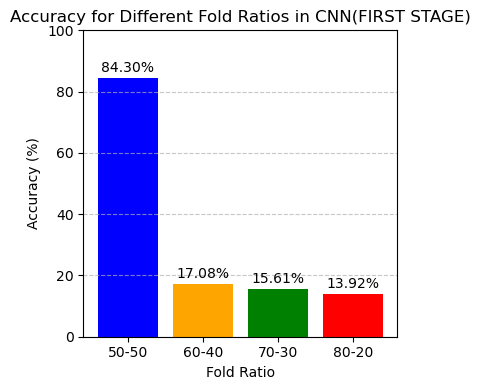

In [100]:
import matplotlib.pyplot as plt


fold_ratios = ['50-50', '60-40', '70-30', '80-20']
accuracies = [84.30, 17.08, 15.61,13.92]  


plt.figure(figsize=(4,4))
plt.bar(fold_ratios, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Fold Ratio')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Different Fold Ratios in CNN(FIRST STAGE)')
plt.ylim(0, 100) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


for i in range(len(fold_ratios)):
    plt.text(i, accuracies[i] + 1, f"{accuracies[i]:.2f}%", ha='center', va='bottom')

plt.show()
